In [69]:
from utils import chatgpt
import json 

### Is Prime

In [79]:
text = open("TheAnswerIs.txt", "r")
answers = text.readlines()

yes = 0
no  = 0
hallucination = 0
cases = ['It can be divided', 'It is divisible', 'It can be evenly divided']

for answer in answers:
    # Yes, 16447 is a prime number.
    if 'Yes' in answer:
        yes += 1  
        
    # 1621 is a prime number.
    elif 'is a prime number' in answer:
        yes += 1
        
    # No, 14639 is not a prime number.
    elif 'No' in answer:
        no += 1
        
        # No, 14639 is not a prime number. It can be divided evenly by 7 and 2091.
        if  any(case in answer for case in cases):
            hallucination += 1
            
    # 8329 is not a prime number.
    elif 'is not a prime number' in answer:
        no += 1
        # 없어도 결과 동일.
        
    if ('No' in answer) and ('is a prime number' in answer):
        print(answer)
    if ('Yes' in answer) and ('is not a prime number' in answer):
        print(answer)
        
print(yes, no, hallucination, yes+no)

No, 2017 is a prime number.

350 150 81 500


### Is Not Pirme

In [24]:
text = open("TheAnswerIsNo.txt", "r")
answers = text.readlines()

yes = 0
no  = 0
hallucination = 0
cases = ['by', 'divisible', 'divided', 'into']

for answer in answers:
    # Yes, 16447 is a prime number.
    if 'Yes' in answer:
        yes += 1  
        
    # 1621 is a prime number.
    elif 'is a prime number' in answer:
        yes += 1
        
    # No, 14639 is not a prime number.
    elif 'No' in answer:
        no += 1
        # No, 14639 is not a prime number. It can be divided evenly by 7 and 2091.
        if  any(case in answer for case in cases):
            hallucination += 1
            
    # 8329 is not a prime number.
    elif 'is not a prime number' in answer:
        no += 1
        if  any(case in answer for case in cases):
            hallucination += 1
        # 없어도 결과 동일.
        
    if ('No' in answer) and ('is a prime number' in answer):
        print(answer)
        if  any(case in answer for case in cases):
            hallucination += 1
    if ('Yes' in answer) and ('is not a prime number' in answer):
        print(answer)
        
        
print(yes, no, hallucination, yes+no)

No, 10201 is not a prime number. It can be divided by 101 and 101 itself is a prime number.

312 188 104 500


### Make a Graph

In [59]:
prime_yes, prime_no, prime_hallucination = 350, 150, 81
not_prime_yes, not_prime_no, not_prime_hallucination = 312, 188, 104
not_t_yes, not_t_no = 341, 159
sts_yes, sts_no = 465, 35

<BarContainer object of 1 artists>

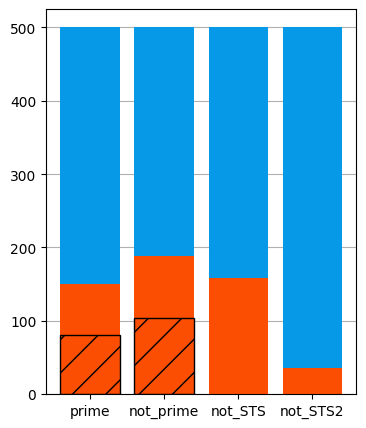

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# 피규어 크기
fig.set_size_inches(4, 5)
# 그래프 뒤에 그리드 그리기
ax.set_axisbelow(True)
# y 축만 그리드 그리기
ax.grid(True, axis='y')
# bar 그리기
ax.bar("prime", prime_no,  label = 'B', color = '#fc4e03')
ax.bar("prime", prime_hallucination, label="hallucination",color='#fc4e03', edgecolor='black', hatch='/')
ax.bar("prime", prime_yes, label = 'A', color = '#0599e8', bottom = prime_no)

ax.bar("not_prime", not_prime_no,  label = 'B', color = '#fc4e03')
ax.bar("not_prime", not_prime_yes, label = 'A', color = '#0599e8', bottom = not_prime_no)
ax.bar("not_prime", not_prime_hallucination, label="hallucination",color='#fc4e03', edgecolor='black', hatch='/')

ax.bar("not_STS", not_t_no,  label = 'B', color = '#fc4e03')
ax.bar("not_STS", not_t_yes, label = 'A', color = '#0599e8', bottom = not_t_no)

ax.bar("not_STS2", sts_no,  label = 'B', color = '#fc4e03')
ax.bar("not_STS2", sts_yes, label = 'A', color = '#0599e8', bottom = sts_no)
# 386(77.2%) # 114

### 문제점. not_prime 데이터에서 no 라고 대답했을 때, 설명된 이유가 논리상 맞지 않음. 
#### 세팅을 최소 50 이상의 소수를 곱해서 만든 정수들인데, 7로 나누어진다고 설명한 경우가 많았음. 

#### => 결과적으로 3개의 케이스를 제외하고는 명확하게 푼 것이 없음
###### case1) No, 17711 is not a prime number. It can be divided evenly by numbers such as 89 and 199. True
###### case2) No, 7921 is not a prime number. It is divisible by 89 and 89 multiplied by 89 gives 7921. True
###### case3) No, 10201 is not a prime number. It can be divided by 101 and 101 itself is a prime number. True

In [31]:
import re 
text = open("TheAnswerIsNo.txt", "r")
answers = text.readlines()

cases = ['by', 'divisible', 'divided', 'into']
hallucination = 0

for answer in answers:
    # No, 14639 is not a prime number.
    if 'No' in answer:
        # No, 14639 is not a prime number. It can be divided evenly by 7 and 2091.
        if answer == "":
            continue
        if  any(case in answer for case in cases):
            numbers = re.findall(r'\d+', answer)
            k = [False for i in numbers if int(i) < 50]
            if False in k :
                hallucination+=1
                continue
            else:
                # print(answer)
                pass

print("Under 50 :", hallucination)
print("Above 50 :", 104-hallucination)

# No, 44599 is not a prime number. It is divisible by 59 and 757. False
# No, 39203 is not a prime number. It can be evenly divided by 59 and 79, among other factors. False
# No, 43429 is not a prime number. It is divisible by 59 and 733. False
# No, 17711 is not a prime number. It can be divided evenly by numbers such as 89 and 199. True
# No, 33233 is not a prime number. It is divisible by 59 and 563. False
# No, 7921 is not a prime number. It is divisible by 89 and 89 multiplied by 89 gives 7921. True
# No, 10201 is not a prime number. It can be divided by 101 and 101 itself is a prime number. True
# No, 29521 is not a prime number. It can be divided evenly by 59 and 501. False
# No, 7081 is not a prime number. It is divisible by 53 and 67. False
# No, 40081 is not a prime number. It is divisible by 73 and 547. False
# No, 43831 is not a prime number. It is divisible by 61 and 719. False
# No, 29999 is not a prime number. It can be factored into 59 占쏙옙 509. False 

Under 50 : 92
Above 50 : 12


# Let's think step by step

In [67]:
import json
f = open("StepByStepNO.txt", "r",encoding='UTF-8')
with open("not_primality_testing.json") as file:
    not_primality = json.load(file)
    
text = (f.read())
print(type(text))
start_idx = text.find("###")
yes = 0
no  = 0
simple_yes = 0
simple_no = 0
else_case = []
# hallucination = 0
# cases = ['by', 'divisible', 'divided', 'into']
# l = ""
for x in not_primality:
    number = x['number']
    end_idx   = text.find("###", start_idx+1)
    output = text[start_idx:end_idx]
    start_idx = end_idx   

    if "No" in output:
        no+=1
        simple_no+=1
    elif "Yes" in output:
        yes+=1
        simple_yes+=1
    elif f"we can conclude that {number} is a prime number" in text:
        yes+=1
    # elif "it is a prime number." in output:
    #     yes+=1
    elif "it is not a prime number." in output:
        no += 1
    elif "it is only divisible by 1 and itself" in text:
        yes+=1
    elif f"{number} does not have any factors other than 1 and itself" in text:
        yes+=1
    elif f"{number} is likely a prime number." in text:
        yes+=1
    elif "it is not divisible" in output:
        yes+=1
    elif f"{number} is indeed a prime number" in text:
        yes+=1
    elif f"{number} is a prime number." in text:
        yes+=1

    elif f"{number} is not a prime number." in text:
        no+=1 
    elif "we can conclude that it is a prime number." in output:
        yes+=1
    else:
        else_case.append(output)

print(yes, no, simple_yes, simple_no)
# print(yes, no, hallucination, yes+no)

<class 'str'>
348 152 174 143


In [68]:
else_case

[]

In [72]:
import json

f = open("StepByStepNO2.txt", "r", encoding='UTF-8')

with open("not_primality_testing.json") as file:
    not_primality = json.load(file)
    
text = f.read()
start_idx = text.find("###")
yes = 0
no  = 0
idk = 0
idk_case = []
no_case = []
# hallucination = 0
for x in not_primality:
    number = x['number']
    end_idx   = text.find("###", start_idx+1)
    output = text[start_idx:end_idx]
    start_idx = end_idx   
    # print(output)
    if f"Therefore, {number} is not a prime number" in text:
        no+=1
        no_case.append(output)
    elif f"Therefore, {number} is a prime number" in text:
        yes+=1
    elif f"we can conclude that {number} is a prime number" in text:
        yes+=1
    elif f"Therefore, {number} is a prime number" in text:
        yes+=1
    elif f"Hence, we can conclude that {number} is a prime number." in text:
        yes+=1
    elif f"yes, {number} is a prime number" in text:
        yes+=1
    elif f"we find that {number} is indeed a prime number" in text:
        yes+=1
    elif f"{number} is not divisible by any number other than 1 and itself" in text:
        yes+=1
    elif f"we can say that {number} is a prime number." in text:
        yes+=1
    elif f"Consequently, {number} is a prime number." in text:
        yes+=1
    elif f"Therefore, {number} is indeed a prime number" in text:
        yes+=1
    elif f"the conclusion is that {number} is a prime number." in text:
        yes+=1
    else:
        idk_case.append(output)
        idk+=1

    # print(f"we can conclude that {number} is a prime number")
    # print(type(number))
print(yes+101-17, no+17, idk-101)
# print(len(else_case))

465 35 0


In [ ]:
# 9313(False) 47143(False) 11881(True) 6889(True) 14213(False) 38849(False) 39421(False) 12139(False) 31429(False) 36359(False) 31831(False)
# 18961(False) 20291(False) 37771(False) 24461(False) 7979(False) 44861 (False)  
# 17
# 11857(False) 38761(False) 28207(False) 16147(False) 17287(False) 14101(False) 46793(False) 46367(False) 34163(False) 38081(False) 49601(False)
# 30623(False) 9727(False) 25387(False) 41827 (False) 13393(False) 32041(False) 33653(False)
# 18

# 6889, 11881 

# 제곱수 잘 찾음.

# 소수를 찾는 방식이 정수에 루트를 씌워 나온 수 전까지 나누어지는지 체크하기 때문에 그렇다.

# 그렇지 않은 경우에는 공들여 틀린다. 
idk_case
# for case in no_case:
#     print(case)

# 2-digit-PrimeNumber

In [25]:
def check(output, number, text):
    if "No" in output:
        return False
    elif "Yes" in output:
        return True
    elif f"we can conclude that {number} is a prime number" in text:
        return True
    # elif "it is a prime number." in output:
    #     return True
    elif "it is not a prime number." in output:
        return False
    elif "it is only divisible by 1 and itself" in text:
        return True
    elif f"{number} does not have any factors other than 1 and itself" in text:
        return True
    elif f"{number} is likely a prime number." in text:
        return True
    elif "it is not divisible" in output:
        return True
    elif f"{number} is indeed a prime number" in text:
        return True
    elif f"{number} is a prime number." in text:
        return True

    elif f"{number} is not a prime number." in text:
        return False 
    elif "we can conclude that it is a prime number." in output:
        return True
    else 
        return output 



In [26]:
import json
f = open("../output/2_digit_prime_output.txt", "r", encoding='UTF-8')
with open("../json/2_digit_prime.json") as file:
    digit_2_primality = json.load(file)
    
text = f.read()
start_idx = text.find("###")

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for x in digit_2_primality:
    number = x['number']

    for i in range(4):
        end_idx   = text.find("###", start_idx+1)
        output = text[start_idx:end_idx]
        start_idx = end_idx
        
        if i < 2:
            if check(output, number, text):
                true_positive += 1
            else: 
                false_negative += 1
        else:
            if check(output, number, text):
                false_positive += 1
            else:
                true_negative += 1


print(true_positive, true_negative, false_positive, false_negative)
accuracy = (true_positive+true_negative)/(true_positive + true_negative + false_positive + false_negative)
print("Accuracy: ", accuracy*100)

38 27 15 4
Accuracy:  77.38095238095238


In [27]:
import json
f = open("../output/3_digit_prime_output.txt", "r", encoding='UTF-8')
with open("../json/3_digit_prime.json") as file:
    digit_3_primality = json.load(file)
    
text = f.read()
start_idx = text.find("###")

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for x in digit_3_primality:
    number = x['number']

    for i in range(4):
        end_idx   = text.find("###", start_idx+1)
        output = text[start_idx:end_idx]
        start_idx = end_idx
        
        if i < 2:
            if check(output, number, text):
                true_positive += 1
            else: 
                false_negative += 1
        else:
            if check(output, number, text):
                false_positive += 1
            else:
                true_negative += 1


print(true_positive, true_negative, false_positive, false_negative)
accuracy = (true_positive+true_negative)/(true_positive + true_negative + false_positive + false_negative)
print("Accuracy: ", accuracy*100)

249 110 176 37
Accuracy:  62.76223776223776


In [28]:
import json
f = open("../output/4_digit_prime_output.txt", "r", encoding='UTF-8')
with open("../json/4_digit_prime.json") as file:
    digit_4_primality = json.load(file)
    
text = f.read()
start_idx = text.find("###")

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for x in digit_4_primality:
    number = x['number']

    for i in range(4):
        end_idx   = text.find("###", start_idx+1)
        output = text[start_idx:end_idx]
        start_idx = end_idx
        
        if i < 2:
            if check(output, number, text):
                true_positive += 1
            else: 
                false_negative += 1
        else:
            if check(output, number, text):
                false_positive += 1
            else:
                true_negative += 1


print(true_positive, true_negative, false_positive, false_negative)
accuracy = (true_positive+true_negative)/(true_positive + true_negative + false_positive + false_negative)
print("Accuracy: ", accuracy*100)

1575 510 1612 547
Accuracy:  49.12818096135721
